<h1>Ningaloo Nino Box Index</h1>

sryan,2019-10-28 12:42:48

Plot serveral variables and different kinds of plots averaged over NNI box, 22-32S,110-116E

I am also trying to come up with a number that can describe the relative contributions of wind vs. buoyancy forcing to the NNI whether their is compensating or reinforcing behaviour.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ningaloo-Nino-Box-Index" data-toc-modified-id="Ningaloo-Nino-Box-Index-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ningaloo Nino Box Index</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#NNI" data-toc-modified-id="NNI-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NNI</a></span><ul class="toc-item"><li><span><a href="#Detect-events" data-toc-modified-id="Detect-events-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Detect events</a></span></li></ul></li></ul></li><li><span><a href="#Spatial-Composites" data-toc-modified-id="Spatial-Composites-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spatial Composites</a></span><ul class="toc-item"><li><span><a href="#Plotting:-Temp-&amp;-Sal" data-toc-modified-id="Plotting:-Temp-&amp;-Sal-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotting: Temp &amp; Sal</a></span></li></ul></li></ul></div>

In [1]:
#%matplotlib widget 
%matplotlib inline

import sys
sys.path.append("../")  # adds upper level to working directory
# somehow the other way does not work
from utils.orca_utilities import orca_index,deseason_month,anomaly,mean_LC_width,load_orca_EIO
from utils.mhw_detection import detect_events


import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
# import seawater as sw

################################
# path to save plots
plotsave = './plots/'

# Load data

## NNI

In [2]:
# # full model data (EIO)
# [k003ts,_,_] = load_orca_EIO('K003.hindcast')
# [k004ts,_,_] = load_orca_EIO('K004.thermhal90')
# [k005ts,_,_] = load_orca_EIO('K005.wind90')

# load saved NNI data
# anomaly
k003 = xr.open_dataset('../data/NNI_K003_22S_32S_110E_117W.nc')
k004 = xr.open_dataset('../data/NNI_K004_22S_32S_110E_117W.nc')
k005 = xr.open_dataset('../data/NNI_K005_22S_32S_110E_117W.nc')
# full field
k003f = xr.open_dataset('../data/NNI_noanom_K003_22S_32S_110E_117W.nc')
k004f = xr.open_dataset('../data/NNI_noanom_K004_22S_32S_110E_117W.nc')
k005f = xr.open_dataset('../data/NNI_noanom_K005_22S_32S_110E_117W.nc')

### Detect events

In [3]:
###########################
# seasonal,monthly threshold

# define threshold
pval = 10
bool_mhw,bool_mcw = detect_events(k003,pval,0,'monthly')   # 0 for depth level

calculate monthly threshold


# Spatial Composites

In [4]:
# # limit data to upper 300m for memory (read by composite function)
# k003ts300 = k003ts.sel(deptht=slice(0,300))
# k004ts300 = k004ts.sel(deptht=slice(0,300))
# k005ts300 = k005ts.sel(deptht=slice(0,300))

# create composite of detected positive and negative events
# the data is then saved to a separate file  
def composite(run,field,anomaly=1):
    if run=='k003':
        if field in ['votemper','vosaline','somxl010']:
            ds = k003ts300
        elif field=='vomecrty':
            ds = k003v
        elif field=='vozocrtx':
            ds = k003u
    elif run=='k004':
        if field in ['votemper','vosaline','somxl010']:
            ds = k004ts300
        elif field=='vomecrty':
            ds = k004v
        elif field=='vozocrtx':
            ds = k004u
    elif run=='k005':
        if field in ['votemper','vosaline','somxl010']:
            ds = k005ts300
        elif field=='vomecrty':
            ds = k005v
        elif field=='vozocrtx':
            ds = k005u
    if anomaly==1:       
        tempa = (ds.groupby('time_counter.month')-ds.groupby('time_counter.month').mean('time_counter'))[field]
    else: tempa = ds[field]
#     tempa_mhw = tempa.where(k003['votemper'][:,0]>=percvalu).mean('time_counter').load()
#     tempa_mcw = tempa.where(k003['votemper'][:,0]<=percvall).mean('time_counter').load()
    tempa_mhw = ((tempa*bool_mhw).mean('time_counter')).load()
    tempa_mcw = ((tempa*bool_mcw).mean('time_counter')).load()
    return tempa_mhw,tempa_mcw

#################
# # initialize dictionaries
# k003_comp_mhw = {}
# k004_comp_mhw = {}
# k005_comp_mhw = {}

# k003_comp_mcw = {}
# k004_comp_mcw = {}
# k005_comp_mcw = {}
#full fields
# k003f_comp_mhw = {}
# k004f_comp_mhw = {}
# k005f_comp_mhw = {}
# k003f_comp_mcw = {}
# k004f_comp_mcw = {}
# k005f_comp_mcw = {}

# # derive composites anomalies for given variables
# for var in ['votemper','vosaline','somxl010']:   #,'vomecrty','vozocrtx'
#     k004_comp_mhw[var],k004_comp_mcw[var] = composite('k004',var)
#     k005_comp_mhw[var],k005_comp_mcw[var] = composite('k005',var)
#     k003_comp_mhw[var],k003_comp_mcw[var] = composite('k003',var)

# # composite for full field 
# for var in ['votemper','vosaline','somxl010','vomecrty','vozocrtx']:
    #k003f_comp_mhw[var],k003f_comp_mcw[var] = composite('k003',var,anomaly=0)
#     k004f_comp_mhw[var],k004f_comp_mcw[var] = composite('k004',var,anomaly=0)
#     k005f_comp_mhw[var],k005f_comp_mcw[var] = composite('k005',var,anomaly=0)

# # save to file
# dict_dict = {'k003_comp_mhw':k003_comp_mhw,'k004_comp_mhw':k004_comp_mhw,'k005_comp_mhw':k005_comp_mhw,
#             'k003_comp_mcw':k005_comp_mcw,'k004_comp_mcw':k004_comp_mcw,'k005_comp_mcw':k005_comp_mcw}
# for name,dict_ in dict_dict.items():    
#     np.save("../data/" + name + ".npy", dict_)



# load saved variables
comp_mhw={}
for run,name in zip(['k003','k004','k005'],['k003_comp_mhw','k004_comp_mhw','k005_comp_mhw']):
    comp_mhw[run] = np.load("../data/" + name + ".npy",allow_pickle=True).item()
    
comp_mcw={}
for run,name in zip(['k003','k004','k005'],['k003_comp_mcw','k004_comp_mcw','k005_comp_mcw']):
    comp_mcw[run] = np.load("../data/" + name + ".npy",allow_pickle=True).item()

## Plotting: Temp & Sal

In [5]:
# plotting function: subplot_composite
plt.rcParams.update({'font.size':14})

# add velocity vectors to map
def plot_vel(run,axp,opt='mhw',depth=0,opt2='anomaly'):
    incx,incy = 7,7
    var = 'vomecrty'
    
    if opt2=='anomaly':
        if opt=='mhw':
            if run=='k003': ds=k003_comp_mhw
            elif run=='k004': ds=k004_comp_mhw
            elif run=='k005': ds=k005_comp_mhw
        elif opt=='mcw':
            if run=='k003': ds=k003_comp_mcw
            elif run=='k004': ds=k004_comp_mcw
            elif run=='k005': ds=k005_comp_mcw
    elif opt2=='full': # plot normal field
        if opt=='mhw':
            if run=='k003': ds=k003f_comp_mhw
            elif run=='k004': ds=k004f_comp_mhw
            elif run=='k005': ds=k005f_comp_mhw
        elif opt=='mcw':
            if run=='k003': ds=k003f_comp_mcw
            elif run=='k004': ds=k004f_comp_mcw
            elif run=='k005': ds=k005f_comp_mcw
    
    dsu = ds['vozocrtx']
    dsu = dsu.where(dsu!=0)
    dsv = ds['vomecrty']
    dsv.where(dsv!=0)
    lonm,latm = np.meshgrid(ds['vozocrtx'].lon[np.arange(0,np.size(dsu,2)-1,incx)],
                            ds['vomecrty'].lat[np.arange(0,np.size(dsu,1)-1,incy)])
    
    axp.quiver(lonm,latm,
               dsu[depth,np.arange(0,np.size(dsu,1)-1,incy),np.arange(0,np.size(dsu,2)-1,incx)],
               dsv[depth,np.arange(0,np.size(dsu,1)-1,incy),np.arange(0,np.size(dsu,2)-1,incx)],
              scale=1,linewidths=2)
    

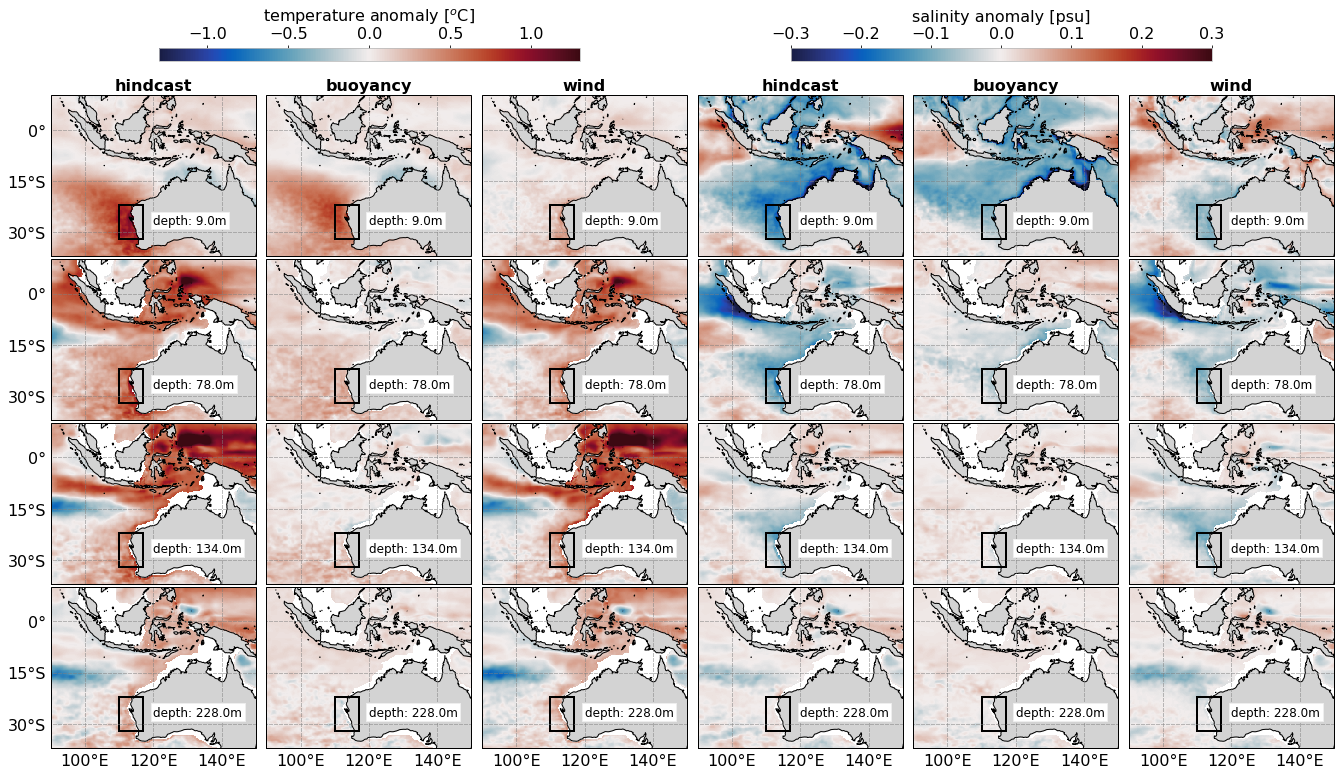

In [6]:
# subplot of spatial patterns of composites for different depth levels
# combines salinity and temperature
# FINAL VERSION

def subplot_composite_anomaly2(temp,ax,event='mhw',var='votemper',run='k003'):
    
#     if ext=='zoom':
#         # which extent
#         extent = (90,130,-40,0)   # large: (75,140,-45,30), zoom: (90,130,-40,0)
#     elif ext=='full':
    extent = [90,150,-37,10] # (75,140,-45,30)
        
    # cold or warm events
    if var=='votemper': vmin,vmax = -1.3,1.3
    elif var=='vosaline': vmin, vmax = -0.3,0.3

    depthlev=0
    for i,depthlev in zip(range(4),[0,7,10,13]):
            hh = temp.where(temp!=0)[depthlev,:,:].plot(ax=ax[i],vmin=vmin,vmax=vmax,add_colorbar=False,
                                                             cmap=plt.get_cmap('cmo.balance'))
            ax[i].set_extent(extent,crs=proj)
            ax[i].set_title('')
            tt = ax[i].text(0.5,0.2,'depth: ' + np.str(np.round(temp.deptht[depthlev].values))+'m',
                         transform=ax[i].transAxes,size=12)
            tt.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
            ax[i].add_feature(cartopy.feature.LAND, color='lightgray')
            gl = ax[i].gridlines(crs=proj, draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--',
                                  xlocs=range(60,161,20),ylocs=range(-60,45,15))
            gl.ylabels_right = False
            gl.xlabels_top = False
            ax[i].coastlines(resolution='50m')
            # mark NNI rectangle
            ax[i].add_patch(mpatches.Rectangle(xy=[110, -32], width=7, height=10,
                                                facecolor='none',edgecolor='k',linewidth=2,
                                                transform=proj))
            
            # add column title
            if (i==0 and run=='k003'): ax[i].set_title('hindcast',weight='bold')
            elif (i==0 and run=='k004'): ax[i].set_title('buoyancy',weight='bold')
            elif (i==0 and run=='k005'): ax[i].set_title('wind',weight='bold')
            
            # add velocity field
#             if addvel==1: plot_vel(run,ax[i],event,depthlev)
            
           # depthlev=depthlev+1

            # take care of labels
            if i==3:
                gl.xformatter = LONGITUDE_FORMATTER
                gl.xlabel_style = {'size':16}
            else: gl.xlabels_bottom = False
            if (var=='votemper' and run=='k003'):
                gl.yformatter = LATITUDE_FORMATTER
                gl.ylabel_style = {'size':16}
            else: gl.ylabels_left=False; 
            
            
    # add colorbar
    if (var=='votemper' and run=='k003'):
        cbaxes = fig.add_axes([0.1, 0.92, 0.3, 0.015])
        cb = plt.colorbar(hh, cax=cbaxes, orientation='horizontal')
        cbaxes.xaxis.set_ticks_position("top")
        cbaxes.set_title('temperature anomaly [$^o$C]')
    if (var=='vosaline' and run=='k003'):
        cbaxes = fig.add_axes([0.55, 0.92, 0.3, 0.015])
        cb = plt.colorbar(hh, cax=cbaxes, orientation='horizontal')
        cbaxes.xaxis.set_ticks_position("top")
        cbaxes.set_title('salinity anomaly [psu]')
#     elif var=='vosaline':
#         cb = plt.colorbar(hh, cax=cbaxes, orientation='vertical',label='salinity anomaly [$^o$C]')

#     cb.ax.tick_params(labelsize=13)
    
#     if anomaly==1:
#     plt.savefig(plotsave + 'fig_' +  event + '_latlon_composite_depthlevels_' + 'rev1.png',dpi=300,bbox_inches='tight')
#     else:
#         plt.savefig(plotsave + event + '_' + var + '_' + run + '_latlon_composite_depthlevels_' +
#            ext + '_vel.png',dpi=300,bbox_inches='tight')
#     plt.close('all')

###################
# plotting
###################

# FINAL VERSION
plt.rcParams.update({'font.size':16})
proj = ccrs.PlateCarree()
fig,ax = plt.subplots(nrows=4,ncols=6,figsize=(19.5,12),subplot_kw=dict(projection=proj))
plt.subplots_adjust(hspace=0.02,left=0.02,right=0.94,wspace=0.01)

j = 0
for var in ['votemper','vosaline']:
    for run in ['k003','k004','k005']:
        subplot_composite_anomaly2(comp_mhw[run][var],ax[:,j],'mhw',var,run=run)# zoom option as well
        j=j+1    

# annotations
# t = plt.text(-0.05, 0.75, 'JRA55 forcing', transform=plt.gcf().transFigure,
#                 size=12, weight='bold',zorder=10,rotation=90)
# t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))

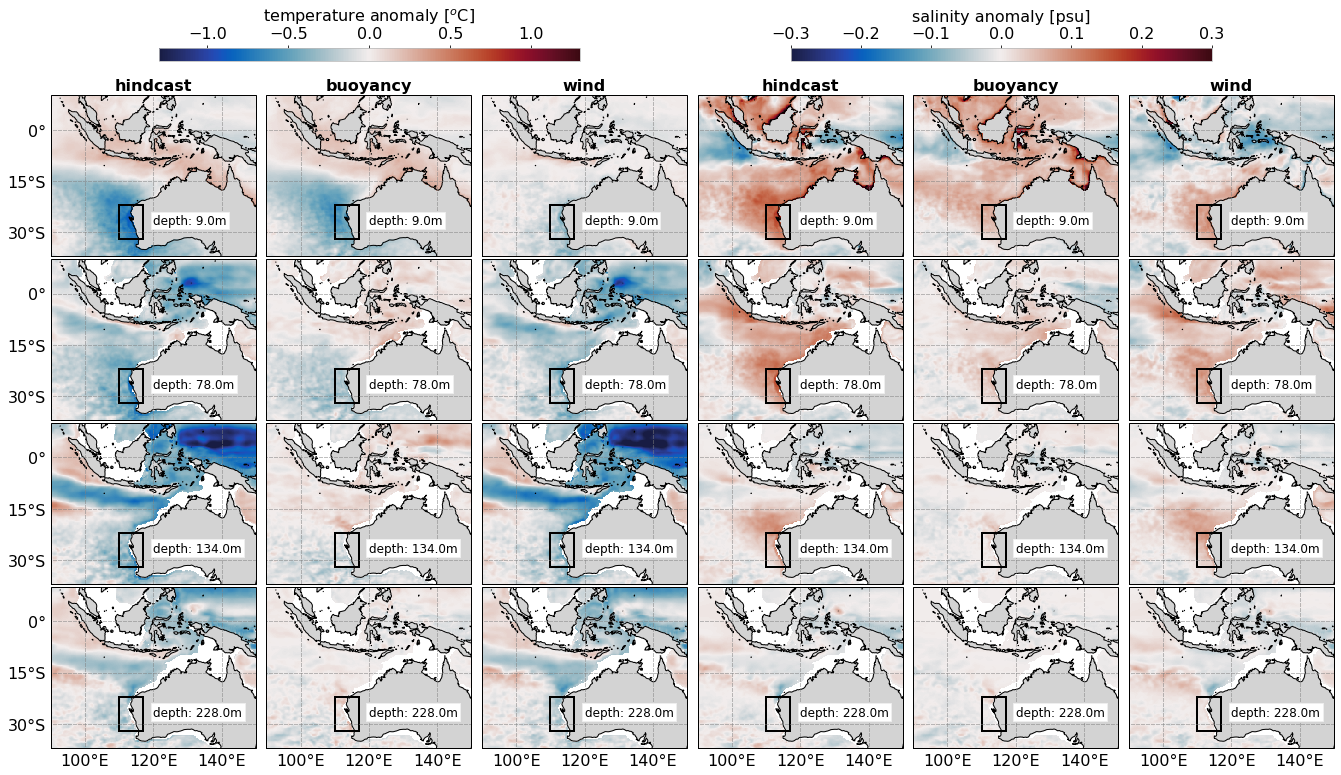

In [7]:
##### Cold spells ####

# FINAL VERSION
plt.rcParams.update({'font.size':16})
proj = ccrs.PlateCarree()
fig,ax = plt.subplots(nrows=4,ncols=6,figsize=(19.5,12),subplot_kw=dict(projection=proj))
plt.subplots_adjust(hspace=0.02,left=0.02,right=0.94,wspace=0.01)

j = 0
for var in ['votemper','vosaline']:
    for run in ['k003','k004','k005']:
        subplot_composite_anomaly2(comp_mcw[run][var],ax[:,j],'mcw',var,run=run)# zoom option as well
        j=j+1 

I modified these figures with inkscape and added a slightly larger gap between column 3 and 4.